In [97]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp

A07.1 - Correlation MSTs

Task: Build MSTs from correlations and analyze them

+ from the correlation matrices, build the Minimum Spanning Trees (see lecture)

+ assign the correct ticker (’AAPL’, ’AMZN’, ...) as an attribute to the nodes and calculate the degrees

+ compare the MST degree distributions of the 1 hour, 1 minute, Normal and One-Factor correlations

In [98]:
# Load data
cormats = []

cormats.append(np.load('./data/cormat_1h.npy'))
cormats.append(np.load('./data/cormat_1m.npy'))
cormats.append(np.load('./data/cormat_gaussian_1h.npy'))
cormats.append(np.load('./data/cormat_gaussian_1m.npy'))
cormats.append(np.load('./data/cormat_onefactor_1h.npy'))
cormats.append(np.load('./data/cormat_onefactor_1m.npy'))

stocknames = {}
doc = open('./data/stocknames.txt', 'r').read().splitlines()

for i in range(len(doc)):
    stocknames[i] = doc[i]

#print(stocknames)

In [190]:
eigvals = []
eigvac = []
msts = []

#from the correlation matrices, build the Minimum Spanning Trees (see lecture)
for cormat in cormats:
    eigval, eigvec = np.linalg.eig(cormat)
    eigvals.append(eigval)
    eigvac.append(eigvac)

    # Turn correlation to distance
    distance = np.sqrt(2 * (1 - cormat))
    graph = nx.from_numpy_matrix(distance)
    # Set atrributes
    nx.set_node_attributes(graph, stocknames, 'ticker')
    nx.get_node_attributes(graph, 'ticker')

    mst = nx.minimum_spanning_tree(graph, weight='weight')
    msts.append(mst)

In [193]:
# nx.draw(msts[0],node_size = 25)
# nx.draw(msts[1],node_size = 25)

In [177]:
# Calculate degrees 
mst_degree = []
measurements = []
count = 0

for mst in msts:
    degree = mst.degree()
    degrees = [degree[i] for i in mst.nodes()]
    ndegrees = np.unique(np.array([ degree[i] for i in mst.nodes() ]))
    mst_degree.append(ndegrees)

    # measurements
    for i in ndegrees:
        measurements.append([])
        measurements[count].append(degrees.count(i))
    
    count= count + 1


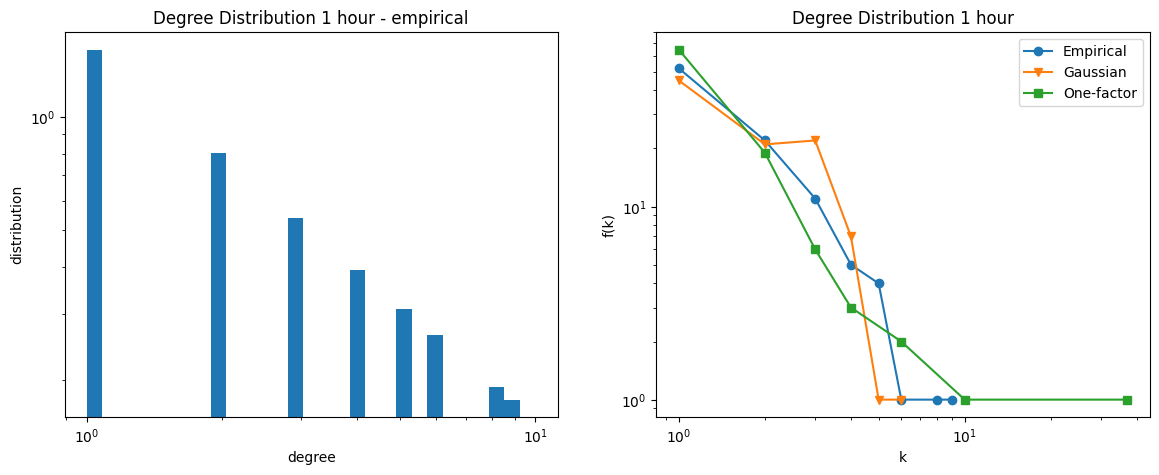

In [178]:
# Compare deg distributions REFER to Lec 8 - Page 28
figure, axis = plt.subplots(1, 2, figsize=(14,5))

my_bins = np.logspace(np.log10(min(mst_degree[0])),np.log10(max(mst_degree[0]) +1), 30 ) 
_ = axis[0].hist(mst_degree[0], bins = my_bins, density = True)
axis[0].set_title("Degree Distribution 1 hour - empirical")
axis[0].set_xlabel("degree")
axis[0].set_ylabel("distribution")
axis[0].set_xscale("log")
axis[0].set_yscale("log")

axis[1].plot(mst_degree[0],measurements[0], marker='o', label="Empirical")
axis[1].plot(mst_degree[2],measurements[2], marker='v', label="Gaussian")
axis[1].plot(mst_degree[4],measurements[4], marker='s', label="One-factor")
axis[1].set_title("Degree Distribution 1 hour")
axis[1].set_xlabel("k")
axis[1].set_ylabel("f(k)")
axis[1].set_xscale("log")
axis[1].set_yscale("log")
axis[1].legend()

plt.show()

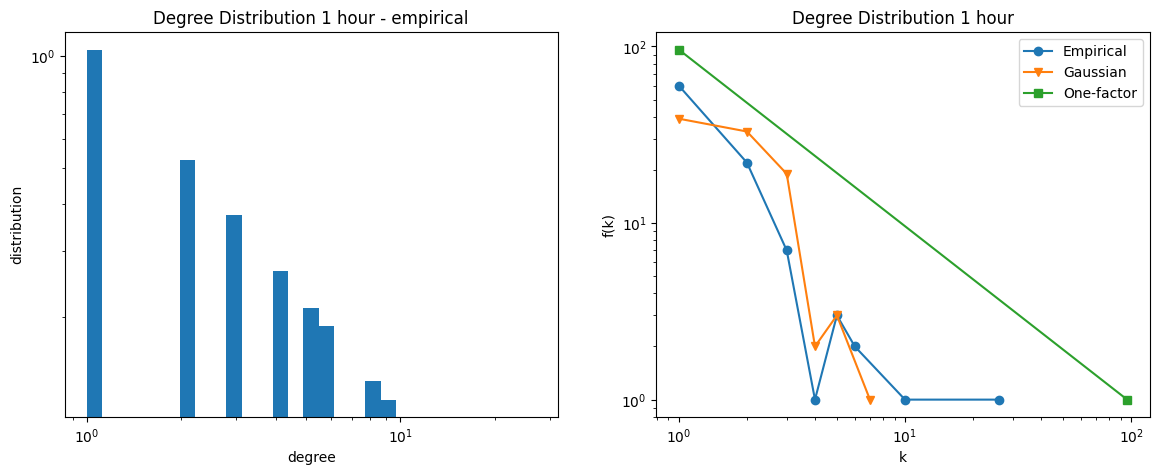

In [170]:
# Compare deg distributions REFER to Lec 8 - Page 28
figure, axis = plt.subplots(1, 2, figsize=(14,5))

my_bins = np.logspace(np.log10(min(mst_degree[1])),np.log10(max(mst_degree[1]) +1), 30 ) 
_ = axis[0].hist(mst_degree[0], bins = my_bins, density = True)
axis[0].set_title("Degree Distribution 1 minute - empirical")
axis[0].set_xlabel("degree")
axis[0].set_ylabel("distribution")
axis[0].set_xscale("log")
axis[0].set_yscale("log")

axis[1].plot(mst_degree[1],measurements[1], marker='o', label="Empirical")
axis[1].plot(mst_degree[3],measurements[3], marker='v', label="Gaussian")
axis[1].plot(mst_degree[5],measurements[5], marker='s', label="One-factor")
axis[1].set_title("Degree Distribution 1 minute")
axis[1].set_xlabel("k")
axis[1].set_ylabel("f(k)")
axis[1].set_xscale("log")
axis[1].set_yscale("log")
axis[1].legend()

plt.show()

A07.2 - Conclusions
Task: finish the analysis by drawing conclusions Answer the following questions (for both timescales):

1. Is there a ‘market mode’?

Yes. From two plots below, clearly there exists a largest 𝜆1 among all for both timescales (around 1.6 for 1h and 1.25 for 1m).

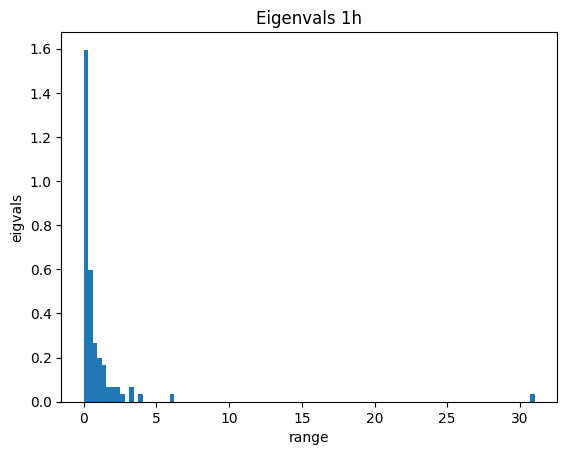

In [112]:
_ = plt.hist(eigvals[0], bins = 100, density = True)
plt.title("Eigenvals 1h")
plt.xlabel("range")
plt.ylabel("eigvals")
plt.show()

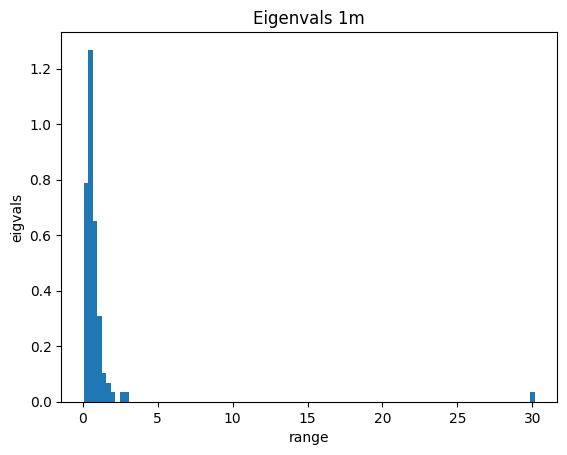

In [113]:
_ = plt.hist(eigvals[1], bins = 100, density = True)
plt.title("Eigenvals 1m")
plt.xlabel("range")
plt.ylabel("eigvals")
plt.show()

2. Which are the 5 stocks with highest degree on the 1 minute and 1 hour MST?

Results are printed below

In [152]:
# Sort ref: https://www.programiz.com/python-programming/methods/built-in/sorted
def sort_param(elem):
    return elem[1]

# 1 minute
arr_1m = np.array(msts[1].degree())
sorted_arr_1m = sorted(arr_1m, key = sort_param, reverse = True)[:5]

print("Top 5 stocks 1 minute: ")
for i in sorted_arr_1m:
    #nx.get_node_attributes(msts[1], 'ticker')[i[0]]
    print(nx.get_node_attributes(msts[1], 'ticker')[i[0]] + ": " + str(i[1]))

Top 5 stocks 1 minute: 
HON: 26
EMR: 10
COP: 6
JPM: 6
COF: 5


In [153]:
# 1 h
arr_1h = np.array(msts[0].degree())
sorted_arr_1h = sorted(arr_1h, key = sort_param, reverse = True)[:5]

print("Top 5 stocks 1 hour: ")
for i in sorted_arr_1h:
    #nx.get_node_attributes(msts[1], 'ticker')[i[0]]
    print(nx.get_node_attributes(msts[0], 'ticker')[i[0]] + ": " + str(i[1]))

Top 5 stocks 1 hour: 
DIS: 9
HON: 8
GOOG: 6
GD: 5
JNJ: 5



3. Is the degree distribution of MSTs qualitatively the same at 1 minute and 1 hour?

I would say they are similar in linear declining pattern. Also, the distributions are also kind of match although not 100%.

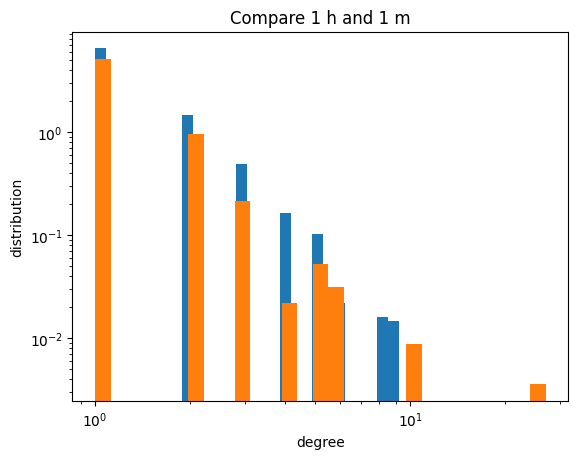

In [175]:
my_bins_1 = np.logspace(np.log10(min(mst_degree[0])),np.log10(max(mst_degree[0]) +1), 30 ) 
my_bins = np.logspace(np.log10(min(mst_degree[1])),np.log10(max(mst_degree[1]) +1), 30 ) 
_ = plt.hist(mst_degree[0], bins = my_bins_1, density = True)
_ = plt.hist(mst_degree[1], bins = my_bins, density = True)
plt.title("Compare 1 h and 1 m")
plt.xlabel("degree")
plt.ylabel("distribution")
plt.xscale("log")
plt.yscale("log")

4. Is the degree distribution of MSTs well reproduced by the null Gaussian and One-Factor models?

From the plot 1 hour in 7.1.3, Gaussian and One-Factor fits well to emprical one. However, for plot 1 minute, only Gaussian fits well but not One-Factor. One-Factor appears like a straight diagnol line which is far away from the empirical one.